In [25]:

import pandas as pd
from pathlib import Path   
from functools import reduce

In [26]:
project_path = Path.cwd().parent 
data_path = project_path / 'data' 

In [27]:
posts = pd.read_json(data_path / 'gold' / 'posts.json')
posts_enriched = pd.read_json(data_path / 'gold' / 'posts_enriched.jsonl', lines=True, orient='records')
relevance = pd.read_json(data_path / 'gold' / 'relevance_analysis.json')
reputation = pd.read_json(data_path / 'gold' / 'reputation_analysis.json')

# Data Processing

## Posts

In [28]:
posts = posts.loc[:,['id', 'subreddit', 'created_utc', 'score', 'num_comments']].set_index('id')

In [29]:
posts['created_utc'] = pd.to_datetime(posts['created_utc'], unit='s')
posts.rename(columns={'created_utc': 'created_at'}, inplace=True)

## Posts enriched

In [30]:
posts_enriched

,id,analysis
0,1fxcvvo,"{'sentiment': 'Neutral', 'keywords': ['picture..."
1,os65ni,"{'sentiment': 'Neutral', 'keywords': ['Hong Ko..."
2,1kbd9t3,"{'sentiment': 'Neutral', 'keywords': ['China',..."
3,17c45a3,"{'sentiment': 'Neutral', 'keywords': ['gold', ..."
4,1c8md97,"{'sentiment': 'Neutral', 'keywords': ['gold', ..."
...,...,...
2147,1lnshfw,"{'sentiment': 'Neutral', 'keywords': ['Canada'..."
2148,1llzc73,"{'sentiment': 'Negative', 'keywords': ['gold b..."
2149,1lnva1w,"{'sentiment': 'Positive', 'keywords': ['gold',..."
2150,2vnacm,"{'sentiment': 'Neutral', 'keywords': ['gold', ..."


In [31]:
posts_enriched =  pd.json_normalize(posts_enriched.to_dict(orient='records'), sep='_')  

In [32]:
try :
    posts_enriched.set_index('id', inplace=True)
except :
    print('Index already set')

In [33]:
original_columns = posts_enriched.columns

In [34]:
new_columns = [col.replace('analysis_', '') for col in original_columns]

In [35]:
posts_enriched.columns = new_columns

In [36]:
posts_enriched = posts_enriched.iloc[:, :-1]

In [37]:
posts_enriched.head()

,sentiment,keywords,themes,concerns_detected_environment,concerns_detected_health,concerns_detected_working conditions,concerns_detected_child labor,concerns_detected_pollution,concerns_detected_deforestation,concerns_detected_biodiversity loss,...,concerns_detected_local employment,concerns_detected_displacement,concerns_detected_community rights,concerns_detected_indigenous rights,concerns_detected_waste management,concerns_detected_foreign exploitation,concerns_detected_sustainability,concerns_detected_safety regulations,mining_stance,topic_classification
id,,,,,,,,,,,,,,,,,,,,,
1fxcvvo,Neutral,"[picture, thousand words, image]","[visual communication, lack of textual content]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neutral,other
os65ni,Neutral,"[Hong Kong, gold medal, anthem, Chinese, protest]","[political protest, nationalism]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neutral,political
1kbd9t3,Neutral,"[China, gold, buying, gold mining]","[global economics, commodity markets]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neutral,economic
17c45a3,Neutral,"[gold, bonds, China, Taiwan, sanctions]","[geopolitics, economic strategy]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neutral,economic
1c8md97,Neutral,"[gold, medal, swimming, olympics, China]","[sports, competition]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neutral,sports


## Relevance

In [38]:
relevance = pd.read_json(data_path / 'gold' / 'relevance_analysis.json').T.iloc[:,[0,1]]

In [39]:
relevance.head()

,relevant,confidence
os65ni,False,99
1fxcvvo,False,90
1eh1q4o,False,99
or63x9,False,100
p0dcdb,False,99


## Reputation 

In [40]:
reputation = pd.read_json(data_path / 'gold' / 'reputation_analysis.json').T.iloc[:,:-10]

In [41]:
reputation.head()

,sentiment,sentiment_score,credibility,credibility_score,expertise_level,expertise_score,controversy_level,controversy_score,market_impact,market_impact_score,public_interest,public_interest_score,information_quality,information_quality_score,overall_reputation_score
1kbd9t3,neutral,10,low,30,novice,20,high,80,positive,40,medium,60,poor,25,25
1k1wft7,neutral,10,low,30,novice,20,medium,60,neutral,10,low,30,poor,25,20
1cfgl56,neutral,10,low,30,novice,20,medium,60,positive,40,medium,60,poor,30,25
1kq02e1,neutral,10,medium,60,novice,20,low,10,neutral,0,low,20,good,70,27
1jy5hty,neutral,0,low,20,novice,10,none,0,neutral,0,very_low,5,poor,20,10


In [42]:
dfs = [posts, posts_enriched, relevance, reputation]

In [47]:
posts_final = reduce(lambda left, right: pd.merge(left,right, left_index=True , right_index=True, how='inner'), dfs)

In [ ]:
def posts_precessor(mineral_folder: Path):
    
    
    posts = pd.read_json(mineral_folder / 'posts.json')
    posts_enriched = pd.read_json(mineral_folder/ 'posts_enriched.jsonl', lines=True, orient='records')
    relevance = pd.read_json(mineral_folder / 'relevance_analysis.json')
    reputation = pd.read_json(mineral_folder / 'reputation_analysis.json')
    
    #Posts 
    posts = posts.loc[:,['id', 'subreddit', 'created_utc', 'score', 'num_comments']].set_index('id')
    posts['created_utc'] = pd.to_datetime(posts['created_utc'], unit='s')
    posts.rename(columns={'created_utc': 'created_at'}, inplace=True)

    #Posts Enriched
    
    posts_enriched =  pd.json_normalize(posts_enriched.to_dict(orient='records'), sep='_')  
    posts_enriched.set_index('id', inplace=True)
    
    original_columns = posts_enriched.columns
    new_columns = [col.replace('analysis_', '') for col in original_columns]
    posts_enriched.columns = new_columns
    posts_enriched = posts_enriched.iloc[:, :-1]
    
    #Relevance
    
    relevance = relevance.T.iloc[:,[0,1]]
    
    #Reputation
    reputation = reputation.T.iloc[:,:-10]
    
    dfs = [posts, posts_enriched, relevance, reputation]
    
    posts_final = reduce(lambda left, right: pd.merge(left,right, left_index=True , right_index=True, how='inner'), dfs)
    
    return posts_final
    

    
        
    
    
    

,subreddit,created_at,score,num_comments,sentiment_x,keywords,themes,concerns_detected_environment,concerns_detected_health,concerns_detected_working conditions,...,expertise_score,controversy_level,controversy_score,market_impact,market_impact_score,public_interest,public_interest_score,information_quality,information_quality_score,overall_reputation_score
1kbd9t3,China,2025-04-30 10:38:02,100,49,Neutral,"[China, gold, buying, gold mining]","[global economics, commodity markets]",0.0,0.0,0.0,...,20,high,80,positive,40,medium,60,poor,25,25
1k1wft7,China,2025-04-18 04:28:37,39,23,Neutral,"[gold, China, U.S., mining, reserves]","[gold reserves, geopolitical comparison]",0.0,0.0,0.0,...,20,medium,60,neutral,10,low,30,poor,25,20
1cfgl56,China,2024-04-28 20:43:06,138,43,Positive,"[gold, China, investors, safe haven asset, dem...","[gold market trends, investment]",0.0,0.0,0.0,...,20,medium,60,positive,40,medium,60,poor,30,25
1kq02e1,China,2025-05-19 01:40:23,46,3,Neutral,"[gold, copper, Chinese trader, investment, bil...","[commodities trading, economic activity]",0.0,0.0,0.0,...,20,low,10,neutral,0,low,20,good,70,27
1jy5hty,China,2025-04-13 11:25:21,1,2,Neutral,"[gold, price, Harbin, China, pure gold]","[gold purchasing, gold price]",0.0,0.0,0.0,...,10,none,0,neutral,0,very_low,5,poor,20,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1llzc73,Gold,2025-06-27 17:09:56,1657,712,Negative,"[gold bars, fake, eBay, fraud, Perth Mint, aut...","[online fraud, consumer protection]",0.0,0.0,0.0,...,20,medium,60,neutral,-10,high,85,fair,65,-15
1ll3o2s,Gold,2025-06-26 15:52:05,508,182,Neutral,"[gold, sell, NYC, price, ounces]","[gold selling, price estimation]",0.0,0.0,0.0,...,65,low,20,neutral,0,high,80,fair,60,45
1lmmuho,Gold,2025-06-28 13:29:08,6,154,Positive,"[gold, BTC, market cap, store of value, wealth...","[gold vs. bitcoin, tangible assets]",0.0,0.0,0.0,...,30,high,90,positive,40,high,80,fair,50,50
1lnva1w,mining,2025-06-30 01:32:42,0,7,Positive,"[gold, extraction, phones, laptops, recycling,...","[resource recovery, technology]",0.0,0.0,0.0,...,10,medium,60,neutral,0,low,20,poor,20,-10


In [44]:
a = posts_final.loc[~pd.isna(posts_final['overall_reputation_score'])]

In [45]:
a

,subreddit,created_at,score,num_comments,sentiment_x,keywords,themes,concerns_detected_environment,concerns_detected_health,concerns_detected_working conditions,...,expertise_score,controversy_level,controversy_score,market_impact,market_impact_score,public_interest,public_interest_score,information_quality,information_quality_score,overall_reputation_score
107vbbq,mining,2023-01-10 00:31:13,70,1,Neutral,"[gold mining, rock crusher, hydro powered, Ota...","[historical mining technology, gold mining his...",0.0,0.0,0.0,...,70,none,5,neutral,0,low,15,good,75,40
10h5h14,canada,2023-01-20 19:13:49,296,117,Negative,"[gold, silver, theft, Toronto, teens, gunpoint...","[crime, theft of precious metals]",0.0,0.0,0.0,...,20,medium,60,negative,-30,high,80,good,80,-10
10ie7c4,environment,2023-01-22 07:44:55,26,0,Negative,"[gold mining, Ecuador, national park, environm...","[environmental damage, conservation]",0.8,0.0,0.0,...,20,medium,60,negative,-30,low,10,fair,40,-20
10nk8fk,geology,2023-01-28 17:19:26,21,1,Neutral,"[gold, mining, minerals, slag, abandoned, Wena...","[abandoned mine, geology]",0.0,0.0,0.0,...,30,none,0,neutral,0,low,20,fair,50,35
10qebrw,geology,2023-01-31 23:42:27,39,26,Neutral,"[gold, mining, drill core sample]","[gold exploration, mining process]",0.0,0.0,0.0,...,60,low,20,neutral,0,low,40,fair,50,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zsnh08,environment,2022-12-22 14:34:12,20,0,Negative,"[gold mining, Ecuador, protected area, invasio...","[environmental destruction, illegal mining]",0.8,0.2,0.2,...,10,medium,50,negative,-30,low,10,poor,20,-25
ztsfvw,mining,2022-12-23 20:57:40,114,5,Neutral,"[gold, mining, shaking table]","[gold mining, mineral processing]",0.0,0.0,0.0,...,20,none,0,neutral,0,low,30,poor,20,25
zva39b,mining,2022-12-25 23:57:55,1,16,Neutral,"[gold, lode, prospecting, ore, unpatented]","[gold prospecting, mineral acquisition]",0.0,0.0,0.0,...,10,low,15,neutral,0,low,30,poor,25,-5
zy1jmn,geology,2022-12-29 09:52:28,0,0,Neutral,"[gold, mining, geological, property, deposit]","[property sale, mining project]",0.0,0.0,0.0,...,60,low,10,neutral,0,low,10,fair,60,25


In [46]:
a

,subreddit,created_at,score,num_comments,sentiment_x,keywords,themes,concerns_detected_environment,concerns_detected_health,concerns_detected_working conditions,...,expertise_score,controversy_level,controversy_score,market_impact,market_impact_score,public_interest,public_interest_score,information_quality,information_quality_score,overall_reputation_score
107vbbq,mining,2023-01-10 00:31:13,70,1,Neutral,"[gold mining, rock crusher, hydro powered, Ota...","[historical mining technology, gold mining his...",0.0,0.0,0.0,...,70,none,5,neutral,0,low,15,good,75,40
10h5h14,canada,2023-01-20 19:13:49,296,117,Negative,"[gold, silver, theft, Toronto, teens, gunpoint...","[crime, theft of precious metals]",0.0,0.0,0.0,...,20,medium,60,negative,-30,high,80,good,80,-10
10ie7c4,environment,2023-01-22 07:44:55,26,0,Negative,"[gold mining, Ecuador, national park, environm...","[environmental damage, conservation]",0.8,0.0,0.0,...,20,medium,60,negative,-30,low,10,fair,40,-20
10nk8fk,geology,2023-01-28 17:19:26,21,1,Neutral,"[gold, mining, minerals, slag, abandoned, Wena...","[abandoned mine, geology]",0.0,0.0,0.0,...,30,none,0,neutral,0,low,20,fair,50,35
10qebrw,geology,2023-01-31 23:42:27,39,26,Neutral,"[gold, mining, drill core sample]","[gold exploration, mining process]",0.0,0.0,0.0,...,60,low,20,neutral,0,low,40,fair,50,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zsnh08,environment,2022-12-22 14:34:12,20,0,Negative,"[gold mining, Ecuador, protected area, invasio...","[environmental destruction, illegal mining]",0.8,0.2,0.2,...,10,medium,50,negative,-30,low,10,poor,20,-25
ztsfvw,mining,2022-12-23 20:57:40,114,5,Neutral,"[gold, mining, shaking table]","[gold mining, mineral processing]",0.0,0.0,0.0,...,20,none,0,neutral,0,low,30,poor,20,25
zva39b,mining,2022-12-25 23:57:55,1,16,Neutral,"[gold, lode, prospecting, ore, unpatented]","[gold prospecting, mineral acquisition]",0.0,0.0,0.0,...,10,low,15,neutral,0,low,30,poor,25,-5
zy1jmn,geology,2022-12-29 09:52:28,0,0,Neutral,"[gold, mining, geological, property, deposit]","[property sale, mining project]",0.0,0.0,0.0,...,60,low,10,neutral,0,low,10,fair,60,25


In [81]:
len(posts_enriched)

2152

In [82]:
len(posts)

2176

In [83]:
posts.head()

,subreddit,created_at,score,num_comments
id,,,,
os65ni,China,2021-07-26 19:32:12,2489,324
1fxcvvo,China,2024-10-06 09:41:59,12690,589
1eh1q4o,China,2024-07-31 23:25:00,248,156
or63x9,China,2021-07-25 05:58:26,912,172
p0dcdb,China,2021-08-08 11:56:08,496,234


In [84]:
df = posts_enriched.copy()


In [85]:
df[concern_cols]

,concerns_detected_environment,concerns_detected_health,concerns_detected_working conditions,concerns_detected_child labor,concerns_detected_pollution,concerns_detected_deforestation,concerns_detected_biodiversity loss,concerns_detected_water contamination,concerns_detected_air quality,concerns_detected_government policy,concerns_detected_corruption,concerns_detected_economic benefits,concerns_detected_local employment,concerns_detected_displacement,concerns_detected_community rights,concerns_detected_indigenous rights,concerns_detected_waste management,concerns_detected_foreign exploitation,concerns_detected_sustainability,concerns_detected_safety regulations
id,,,,,,,,,,,,,,,,,,,,
1fxcvvo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
os65ni,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1kbd9t3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17c45a3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1c8md97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1lnshfw,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1llzc73,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1lnva1w,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [86]:
concern_cols

['concerns_detected_environment',
 'concerns_detected_health',
 'concerns_detected_working conditions',
 'concerns_detected_child labor',
 'concerns_detected_pollution',
 'concerns_detected_deforestation',
 'concerns_detected_biodiversity loss',
 'concerns_detected_water contamination',
 'concerns_detected_air quality',
 'concerns_detected_government policy',
 'concerns_detected_corruption',
 'concerns_detected_economic benefits',
 'concerns_detected_local employment',
 'concerns_detected_displacement',
 'concerns_detected_community rights',
 'concerns_detected_indigenous rights',
 'concerns_detected_waste management',
 'concerns_detected_foreign exploitation',
 'concerns_detected_sustainability',
 'concerns_detected_safety regulations']

In [87]:
concern_presence

,concerns_detected_environment,concerns_detected_health,concerns_detected_working conditions,concerns_detected_child labor,concerns_detected_pollution,concerns_detected_deforestation,concerns_detected_biodiversity loss,concerns_detected_water contamination,concerns_detected_air quality,concerns_detected_government policy,concerns_detected_corruption,concerns_detected_economic benefits,concerns_detected_local employment,concerns_detected_displacement,concerns_detected_community rights,concerns_detected_indigenous rights,concerns_detected_waste management,concerns_detected_foreign exploitation,concerns_detected_sustainability,concerns_detected_safety regulations
id,,,,,,,,,,,,,,,,,,,,
1fxcvvo,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
os65ni,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1kbd9t3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
17c45a3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1c8md97,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1lnshfw,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1llzc73,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1lnva1w,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


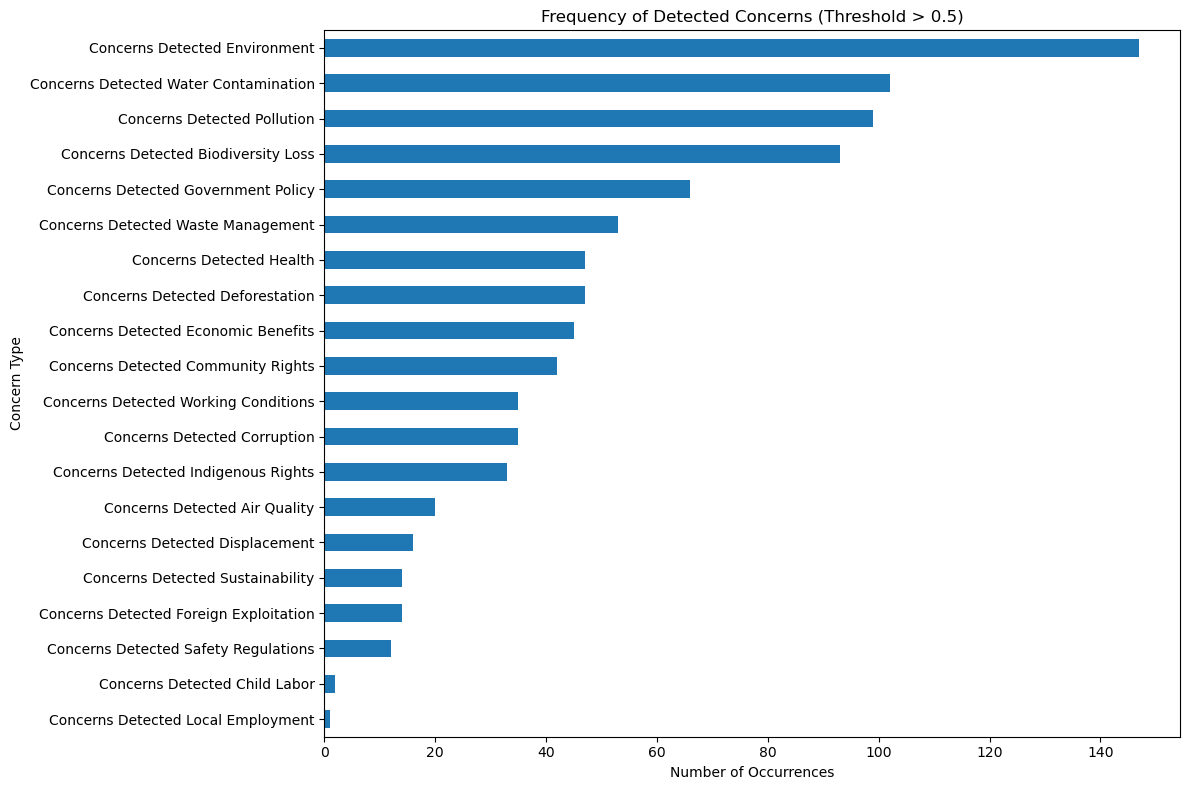

In [88]:
import matplotlib.pyplot as plt
import pandas as pd

# Filter just the concern columns
concern_cols = [col for col in df.columns if 'concerns_detected' in col]

# Calculate presence of concerns with threshold
threshold = 0.5
concern_presence = df[concern_cols].apply(lambda x: x > threshold)

# Calculate frequency of each concern
concern_counts = concern_presence.sum(axis=0).sort_values()

# Check if we have any concerns that meet the threshold
if concern_counts.sum() == 0:
    print("No concerns detected above the threshold of", threshold)
else:
    # Clean the labels for display
    clean_labels = [col.replace('analysis.concerns_detected.', '').replace('_', ' ').title() 
                   for col in concern_counts.index]

    # Plot only if we have data
    plt.figure(figsize=(12, 8))
    concern_counts.plot(kind='barh')
    plt.title(f'Frequency of Detected Concerns (Threshold > {threshold})')
    plt.xlabel('Number of Occurrences')
    plt.ylabel('Concern Type')
    plt.yticks(range(len(clean_labels)), clean_labels)
    plt.tight_layout()
    plt.show()

In [89]:
concern_presence

,concerns_detected_environment,concerns_detected_health,concerns_detected_working conditions,concerns_detected_child labor,concerns_detected_pollution,concerns_detected_deforestation,concerns_detected_biodiversity loss,concerns_detected_water contamination,concerns_detected_air quality,concerns_detected_government policy,concerns_detected_corruption,concerns_detected_economic benefits,concerns_detected_local employment,concerns_detected_displacement,concerns_detected_community rights,concerns_detected_indigenous rights,concerns_detected_waste management,concerns_detected_foreign exploitation,concerns_detected_sustainability,concerns_detected_safety regulations
id,,,,,,,,,,,,,,,,,,,,
1fxcvvo,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
os65ni,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1kbd9t3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
17c45a3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1c8md97,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1lnshfw,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1llzc73,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1lnva1w,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [90]:
 clean_labels = [col.replace('analysis.concerns_detected.', '').replace('_', ' ').title() 
                   for col in concern_counts.index]

['Concerns Detected Local Employment',
 'Concerns Detected Child Labor',
 'Concerns Detected Safety Regulations',
 'Concerns Detected Foreign Exploitation',
 'Concerns Detected Sustainability',
 'Concerns Detected Displacement',
 'Concerns Detected Air Quality',
 'Concerns Detected Indigenous Rights',
 'Concerns Detected Corruption',
 'Concerns Detected Working Conditions',
 'Concerns Detected Community Rights',
 'Concerns Detected Economic Benefits',
 'Concerns Detected Deforestation',
 'Concerns Detected Health',
 'Concerns Detected Waste Management',
 'Concerns Detected Government Policy',
 'Concerns Detected Biodiversity Loss',
 'Concerns Detected Pollution',
 'Concerns Detected Water Contamination',
 'Concerns Detected Environment']

In [92]:
gold_posts = pd.read_json(data_path / 'gold' / 'posts.json')
gold_comments = pd.read_json(data_path / 'gold' / 'comments.json')
gold_relevence_analysis = pd.read_json(data_path / 'gold' / 'relevance_analysis.json')
gold_reputation_analysis = pd.read_json(data_path / 'gold' / 'reputation_analysis.json')


In [93]:
gold_comments_enriched = pd.read_json(data_path / 'gold' / 'comments_enriched.jsonl', lines=True)
gold_posts_enriched = pd.read_json(data_path / 'gold' / 'posts_enriched.jsonl', lines=True, orient='records')



In [94]:
gold_relevence_analysis = gold_relevence_analysis.T.loc[:,['relevant', 'confidence']]
gold_posts.set_index('id', inplace=True)

In [95]:
gold_posts = pd.merge(gold_posts, gold_relevence_analysis, left_index=True, right_index=True, how='outer')


In [96]:
reputation = gold_reputation_analysis.T

In [97]:
# Fully flatten the JSON structure
gold_posts_enriched

,id,analysis
0,1fxcvvo,"{'sentiment': 'Neutral', 'keywords': ['picture..."
1,os65ni,"{'sentiment': 'Neutral', 'keywords': ['Hong Ko..."
2,1kbd9t3,"{'sentiment': 'Neutral', 'keywords': ['China',..."
3,17c45a3,"{'sentiment': 'Neutral', 'keywords': ['gold', ..."
4,1c8md97,"{'sentiment': 'Neutral', 'keywords': ['gold', ..."
...,...,...
2147,1lnshfw,"{'sentiment': 'Neutral', 'keywords': ['Canada'..."
2148,1llzc73,"{'sentiment': 'Negative', 'keywords': ['gold b..."
2149,1lnva1w,"{'sentiment': 'Positive', 'keywords': ['gold',..."
2150,2vnacm,"{'sentiment': 'Neutral', 'keywords': ['gold', ..."


In [98]:
flattened = pd.json_normalize(gold_posts_enriched.to_dict(orient='records'))

In [99]:
flattened

,id,analysis.sentiment,analysis.keywords,analysis.themes,analysis.concerns_detected.environment,analysis.concerns_detected.health,analysis.concerns_detected.working conditions,analysis.concerns_detected.child labor,analysis.concerns_detected.pollution,analysis.concerns_detected.deforestation,...,analysis.concerns_detected.displacement,analysis.concerns_detected.community rights,analysis.concerns_detected.indigenous rights,analysis.concerns_detected.waste management,analysis.concerns_detected.foreign exploitation,analysis.concerns_detected.sustainability,analysis.concerns_detected.safety regulations,analysis.mining_stance,analysis.topic_classification,analysis.relevance_to_gold_score
0,1fxcvvo,Neutral,"[picture, thousand words, image]","[visual communication, lack of textual content]",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neutral,other,NaN
1,os65ni,Neutral,"[Hong Kong, gold medal, anthem, Chinese, protest]","[political protest, nationalism]",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neutral,political,NaN
2,1kbd9t3,Neutral,"[China, gold, buying, gold mining]","[global economics, commodity markets]",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neutral,economic,NaN
3,17c45a3,Neutral,"[gold, bonds, China, Taiwan, sanctions]","[geopolitics, economic strategy]",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neutral,economic,NaN
4,1c8md97,Neutral,"[gold, medal, swimming, olympics, China]","[sports, competition]",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neutral,sports,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2147,1lnshfw,Neutral,"[Canada, CONCACAF Gold Cup, Guatemala, penalty...","[sports, international soccer]",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neutral,sports,0.0
2148,1llzc73,Negative,"[gold bars, fake, eBay, fraud, Perth Mint, aut...","[online fraud, consumer protection]",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neutral,economic,0.8
2149,1lnva1w,Positive,"[gold, extraction, phones, laptops, recycling,...","[resource recovery, technology]",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neutral,technical,0.8
2150,2vnacm,Neutral,"[gold, olympic, children, czech, norwegian, au...","[donation, child custody dispute]",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neutral,social,0.0


In [100]:
gold_posts

,title,selftext,subreddit,created_utc,created_date,score,num_comments,permalink,relevant,confidence
103n8rx,"Canada defeats rival U.S., advances to world j...",,canada,1672886567,2023-01-05T03:42:47,1634,118,https://reddit.com/r/canada/comments/103n8rx/c...,False,99
107vbbq,Gravity fed hydro powered rock crusher. Used i...,,mining,1673310673,2023-01-10T01:31:13,70,1,https://reddit.com/r/mining/comments/107vbbq/g...,True,90
10gj4uh,Fools gold!,,geology,1674177077,2023-01-20T02:11:17,10,3,https://reddit.com/r/geology/comments/10gj4uh/...,False,95
10h5h14,Toronto teens charged after $1.3M in gold and ...,,canada,1674242029,2023-01-20T20:13:49,296,117,https://reddit.com/r/canada/comments/10h5h14/t...,True,70
10ie7c4,Nature Under Threat in Ecuador as Gold Miners ...,,environment,1674373495,2023-01-22T08:44:55,26,0,https://reddit.com/r/environment/comments/10ie...,True,90
...,...,...,...,...,...,...,...,...,...,...
zvyf73,Sunny Days “Gold Dig it” Gold,Heya just wanted to share what the fabled gold...,geology,1672092669,2022-12-26T23:11:09,23,6,https://reddit.com/r/geology/comments/zvyf73/s...,False,95
zy1jmn,Armanis Gold-Polymetallic Deposit,The property mining/geological project documen...,geology,1672307548,2022-12-29T10:52:28,0,0,https://reddit.com/r/geology/comments/zy1jmn/a...,True,95
zybcmn,Gold buyers binge on biggest volumes for 55 years,,Economics,1672335943,2022-12-29T18:45:43,416,94,https://reddit.com/r/Economics/comments/zybcmn...,True,90
zzfg30,Vladimir Putin's 'rocket man' Vladimir Nestero...,,worldnews,1672444217,2022-12-31T00:50:17,32711,1722,https://reddit.com/r/worldnews/comments/zzfg30...,False,99
